# Use  Keras to classify handwritten digits

## 1. Loading the MINIST dataset in Keras, and plot some examples

In [5]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

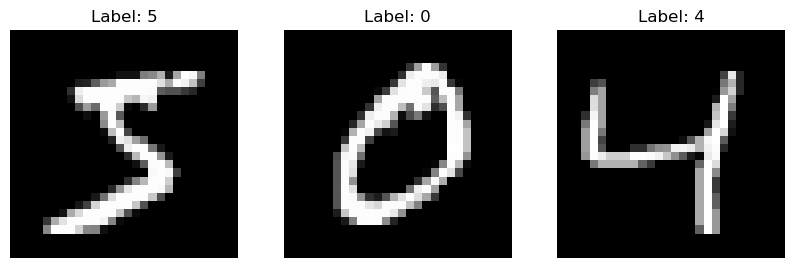

In [6]:
# some sample images
# Create a figure to contain the plots
plt.figure(figsize=(10, 5))

# Loop to plot the first three images
for i in range(3):
    # Create a subplot for each image (1 row, 3 columns, i+1 is the index)
    plt.subplot(1, 3, i + 1)
    
    # Display the image in grayscale
    plt.imshow(train_images[i], cmap='gray')
    
    # Add a title with the corresponding label
    plt.title(f"Label: {train_labels[i]}")
    
    # Hide the x and y axes ticks
    plt.axis('off')

# Show the final plot
plt.show()


In [10]:
# dimensions
print(train_images.shape)
print(train_labels)

print(test_images.shape)
print(test_labels)

(60000, 28, 28)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
[7 2 1 ... 4 5 6]


## 2. The Network Architecture and optimizer

In [16]:
from tensorflow import keras
from keras import layers

# Define the model architecture. A Sequential model is used for a simple,
# linear stack of layers.
model = keras.Sequential([
    
    # The first layer is a fully-connected (Dense) hidden layer.
    # It has 512 neurons (or units).
    # The 'relu' (Rectified Linear Unit) activation function introduces
    # non-linearity into the model, allowing it to learn more complex patterns.
    layers.Dense(512, activation='relu'),
    
    # The second layer is the output layer. It is also a fully-connected layer.
    # It has 10 neurons, which corresponds to the 10 possible classes (digits 0-9).
    # The 'softmax' activation function converts the layer's raw output scores
    # into a probability distribution, where each value represents the probability
    # that the input image belongs to that specific class.
    layers.Dense(10, activation="softmax")
])

# Configure the model for training by specifying the optimizer, loss function,
# and metrics to monitor.
model.compile(
    
    # The 'optimizer' is the algorithm used to update the model's weights
    # in response to the training data. 'rmsprop' is an efficient and popular choice.
    optimizer='rmsprop',
    
    # The 'loss' function measures how inaccurate the model is during training.
    # We use 'sparse_categorical_crossentropy' because this is a multi-class
    # classification problem and our labels are integers (e.g., 7), not
    # one-hot encoded vectors (e.g., [0,0,0,0,0,0,0,1,0,0]).
    loss='sparse_categorical_crossentropy',
    
    # 'metrics' are used to monitor the model's performance. 'accuracy' will
    # calculate the fraction of images that are correctly classified during
    # training and testing.
    metrics=['accuracy']
)

## 3. Preparing the image data